<a href="https://colab.research.google.com/github/thanhphap059/NguyenThanhPhap19146230/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Nguyễn Thanh Pháp 19146230
# Khai báo và sử dụng các thư viện sa
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing

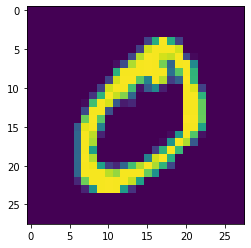

In [ ]:
# Sử dụng tập dữ liệu MNIST với bộ dữ liệu đã chia giữa phần train là 60000 và phần test là 10000
(x_train,y_train),(x_test,y_test)=mnist.load_data()
plt.imshow(x_train[1])
plt.show()

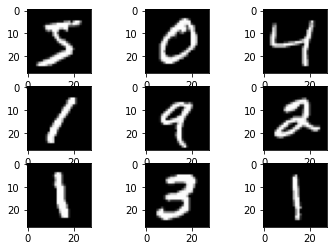

In [ ]:
for i in range(9):
  plt.subplot(330+i+1) 
  plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
# Xử lý phần dữ liệu đã chia
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype ('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [ ]:
# Tạo mô hình
model=Sequential()
# Tạo lớp ẩn thứ nhất với 784 tín hiệu vào (784 hàng và 1 cột) và có 1024 tín hiệu ra sử dụng hàm relu
model.add(Dense(1024,activation='relu',input_shape=(784,)))
# Tạo lớp ẩn thứ hai với 1024 tín hiệu vào, 1024 tín hiệu ra (lấy tín hiệu vào là tín hiệu ra của lớp 1)
model.add(Dense(1024,activation='relu'))
# Tạo lớp ẩn thứ ba với 1024 tín hiệu vào, 10 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1024)              803840    
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 10)                10250     
                                                                 
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Biên dịch
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học 128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ dừng học ngay
history=model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss',patience=20)])

Epoch 1/500
375/375 [==============================] - 24s 63ms/step - loss: 0.2326 - accuracy: 0.9272 - val_loss: 0.1160 - val_accuracy: 0.9662
Epoch 2/500
375/375 [==============================] - 24s 65ms/step - loss: 0.0826 - accuracy: 0.9746 - val_loss: 0.1036 - val_accuracy: 0.9713
Epoch 3/500
375/375 [==============================] - 22s 60ms/step - loss: 0.0575 - accuracy: 0.9834 - val_loss: 0.0947 - val_accuracy: 0.9755
Epoch 4/500
375/375 [==============================] - 23s 61ms/step - loss: 0.0411 - accuracy: 0.9880 - val_loss: 0.1180 - val_accuracy: 0.9718
Epoch 5/500
375/375 [==============================] - 23s 62ms/step - loss: 0.0317 - accuracy: 0.9908 - val_loss: 0.1403 - val_accuracy: 0.9718
Epoch 6/500
375/375 [==============================] - 22s 60ms/step - loss: 0.0255 - accuracy: 0.9922 - val_loss: 0.1318 - val_accuracy: 0.9765
Epoch 7/500
375/375 [==============================] - 23s 61ms/step - loss: 0.0223 - accuracy: 0.9935 - val_loss: 0.1182 - val_ac

In [ ]:
# Đánh giá độ chính xác của mô hình sau khi đã train 
Score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 0.24228200316429138
Test accuary 0.98089998960495


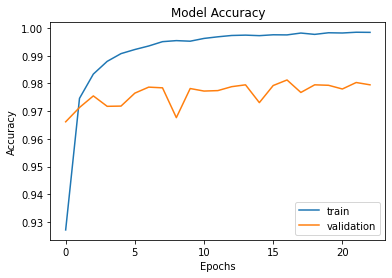

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()